# **Multi Model Heart Disease Classification**

### **Import Libraries & Load Data**
  - Read the CSV file into a DataFrame
  - Display data structure and summary


In [ ]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Load the dataset
heart_data = pd.read_csv('heart.csv')

# Display first few rows
print("First 5 Rows of the Dataset:")
print(heart_data.head())

# Basic info about the dataset
print("\nDataset Information:")
print(heart_data.info())

# Statistical summary
print("\nStatistical Summary:")
print(heart_data.describe())

First 5 Rows of the Dataset:
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null

### **Preprocessing**
  - Handle missing values (if any)
  - Convert categorical variables into numerical (using label encoding or one-hot encoding)
  - Normalize or scale numerical features if needed


In [ ]:
# Check for missing values
print("\nMissing values in each column:")
print(heart_data.isnull().sum())

# Separate features and target
X = heart_data.drop('target', axis=1)
y = heart_data['target']

# Standardize numerical features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame for visualization
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)


Missing values in each column:
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64


### **Exploratory Data Visualization**
  - Create at least three visualizations to explore:
    - Distribution of target variable
    - Correlation heatmap
    - Comparison of features across the target (e.g., chest pain vs. target)


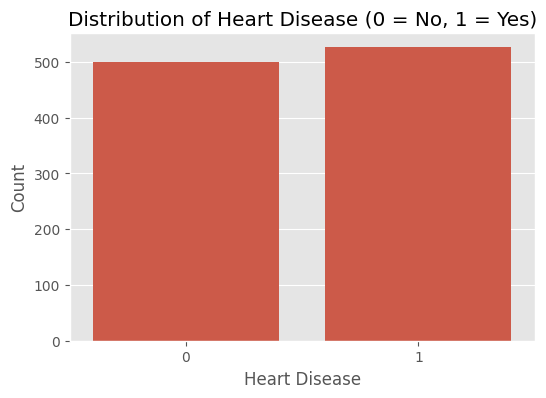

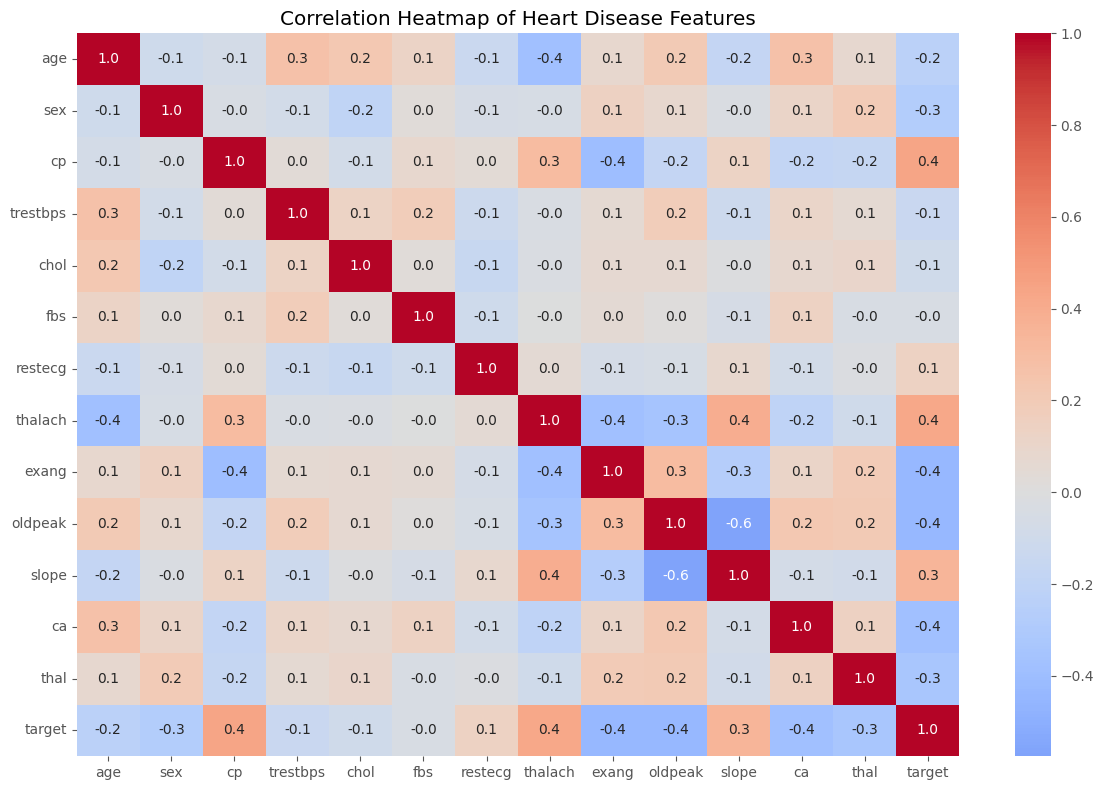

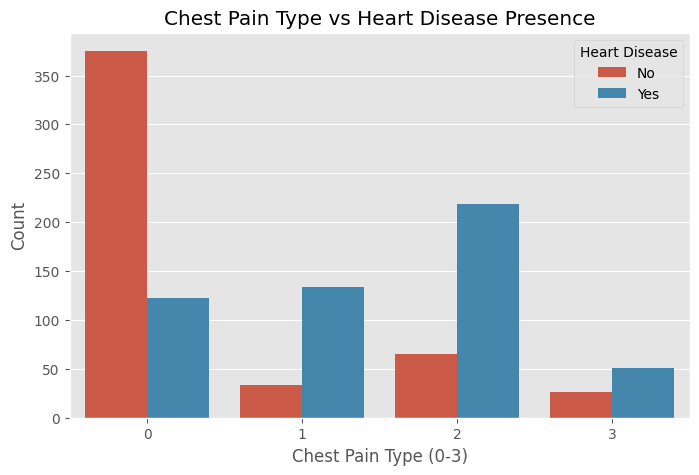

In [ ]:
# Set style for plots
plt.style.use('ggplot')

# Distribution of target variable
plt.figure(figsize=(6, 4))
sns.countplot(x='target', data=heart_data)
plt.title('Distribution of Heart Disease (0 = No, 1 = Yes)')
plt.xlabel('Heart Disease')
plt.ylabel('Count')
plt.savefig('target_distribution.png')
plt.show()

# Correlation heatmap
plt.figure(figsize=(12, 8))
corr_matrix = heart_data.corr()
sns.heatmap(corr_matrix, annot=True, fmt=".1f", cmap='coolwarm', center=0)
plt.title('Correlation Heatmap of Heart Disease Features')
plt.tight_layout()
plt.savefig('correlation_heatmap.png')
plt.show()

# Comparison of features across the target (e.g., chest pain vs. target)
plt.figure(figsize=(8, 5))
sns.countplot(x='cp', hue='target', data=heart_data)
plt.title('Chest Pain Type vs Heart Disease Presence')
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Count')
plt.legend(title='Heart Disease', labels=['No', 'Yes'])
plt.savefig('chest_pain_vs_target.png')
plt.show()

### **Build a Predictive Model**
  - Split the data into training and testing sets
  - Train a Logistic Regression or Random Forest Classifier
  - Evaluate using accuracy, precision, recall, and F1 score

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Initialize models
log_reg = LogisticRegression(max_iter=1000)
rf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train models
log_reg.fit(X_train, y_train)
rf.fit(X_train, y_train)

# Make predictions
log_reg_pred = log_reg.predict(X_test)
rf_pred = rf.predict(X_test)

# Calculate metrics for Logistic Regression
log_reg_accuracy = accuracy_score(y_test, log_reg_pred)
log_reg_precision = precision_score(y_test, log_reg_pred)
log_reg_recall = recall_score(y_test, log_reg_pred)
log_reg_f1 = f1_score(y_test, log_reg_pred)

# Calculate metrics for Random Forest
rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1 = f1_score(y_test, rf_pred)

# Print results
print("\nLogistic Regression Performance:")
print(f"Accuracy: {log_reg_accuracy:.3f}")
print(f"Precision: {log_reg_precision:.3f}")
print(f"Recall: {log_reg_recall:.3f}")
print(f"F1 Score: {log_reg_f1:.3f}")

print("\nRandom Forest Performance:")
print(f"Accuracy: {rf_accuracy:.3f}")
print(f"Precision: {rf_precision:.3f}")
print(f"Recall: {rf_recall:.3f}")
print(f"F1 Score: {rf_f1:.3f}")


Logistic Regression Performance:
Accuracy: 0.805
Precision: 0.763
Recall: 0.866
F1 Score: 0.811

Random Forest Performance:
Accuracy: 0.981
Precision: 1.000
Recall: 0.960
F1 Score: 0.979


### **Visualize Results**
  - Plot the confusion matrix using Seaborn
  - Create a bar chart comparing all the evaluation metrics

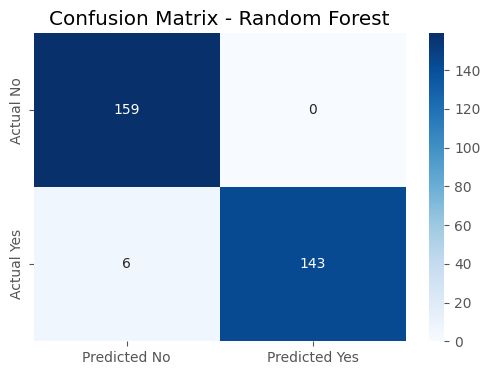

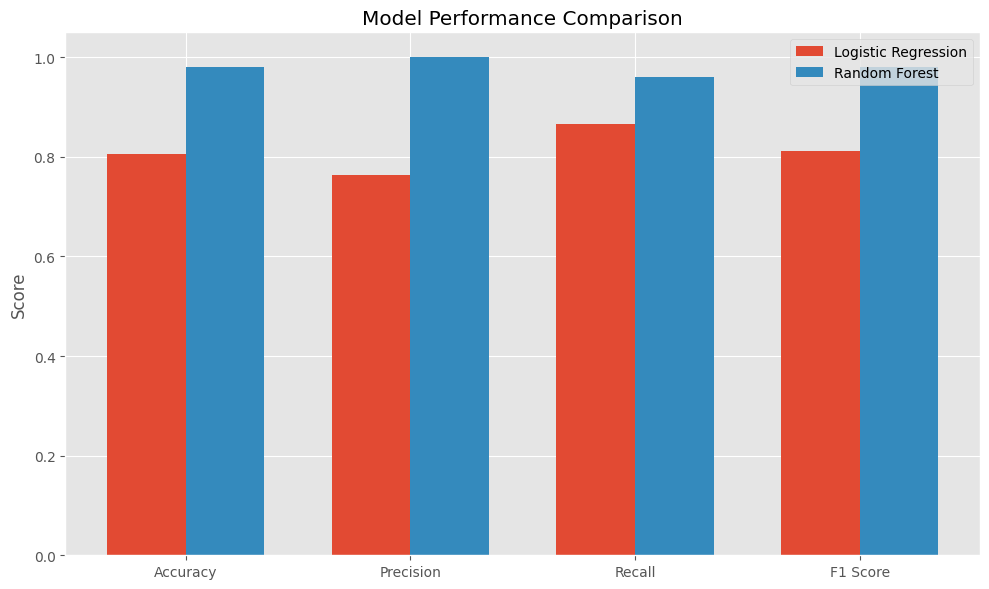

In [ ]:
# Confusion matrix for Random Forest
cm = confusion_matrix(y_test, rf_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Predicted No', 'Predicted Yes'],
            yticklabels=['Actual No', 'Actual Yes'])
plt.title('Confusion Matrix - Random Forest')
plt.savefig('confusion_matrix.png')
plt.show()

# Bar chart comparing evaluation metrics
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
log_reg_scores = [log_reg_accuracy, log_reg_precision, log_reg_recall, log_reg_f1]
rf_scores = [rf_accuracy, rf_precision, rf_recall, rf_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width/2, log_reg_scores, width, label='Logistic Regression')
rects2 = ax.bar(x + width/2, rf_scores, width, label='Random Forest')

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()

fig.tight_layout()
plt.savefig('model_comparison.png')
plt.show()